# 6.2 Exploring relationships

This script contains the following:
1. Importing Visualization Libraries and Data
2. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots
3. Answering question
4. Hypothesis

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
matplotlib.__version__

'3.5.1'

In [2]:
# This option ensures that the charts create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# Using path method to import my dataset
"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [3]:
path = r"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [5]:
path

'C:\\Users\\Peter\\Desktop\\Data Analytics documents\\Data Immersion\\Achievement 6'

In [6]:
# imported the dataset
df = pd.read_csv(os.path.join(path, 'Project','Chocolate_Bar_ratings_cleaned.csv'), index_col = False)

# 2. Exploring Relationships

Step 2.1: Correlations:

In [7]:
df.head()

,Company\n_Maker_if_ known,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\ncontent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [7]:
df.columns

Index(['Company\n_Maker_if_ known', 'Specific Bean Origin\nor Bar Name', 'REF',
       'Review\nDate', 'Cocoa\ncontent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [8]:
# Drop the columns not necessary for the anlysis
df_Analysis = df.drop(['Company\n_Maker_if_ known','Specific Bean Origin\nor Bar Name','Company\nLocation','Bean\nType','Broad Bean\nOrigin'],axis = 1)

In [9]:
# Createing a correlation matrix of the dataframe using pandas

df_Analysis.corr()

,REF,Review\nDate,Cocoa\ncontent,Rating
REF,1.000000,0.985085,0.037742,0.101747
Review\nDate,0.985085,1.000000,0.038157,0.100332
Cocoa\ncontent,0.037742,0.038157,1.000000,-0.164974
Rating,0.101747,0.100332,-0.164974,1.000000


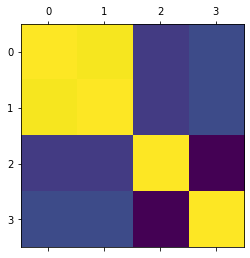

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_Analysis.corr())
plt.show()

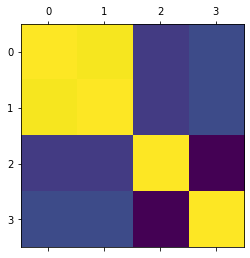

In [11]:
# Save figure
plt.matshow(df_Analysis.corr())
plt.savefig("out3.png") 

Text(0.5, 1.0, 'Correlation Matrix')

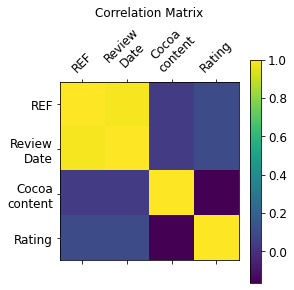

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(df_Analysis.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_Analysis.shape[1]), df_Analysis.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df_Analysis.shape[1]), df_Analysis.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

Looking at the correlation Matrix, the variables do not have a strong relationship. Except in the case of REF and Review Date which shows a strong realtionship, while others have low relationship. 

Creating a correlation heatmap using seaborn

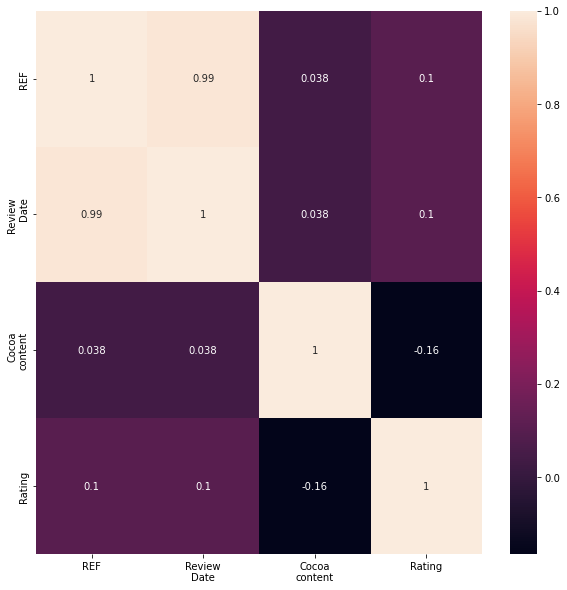

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_Analysis.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The heatmap is more like the same with correlation matrix, except that the correlation values are included in the plot 

Step 2.2: Scatterplots:

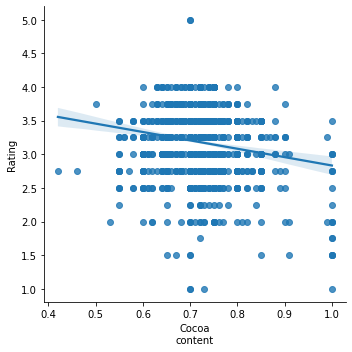

In [14]:
# Creating a scatterplot for the "Cocoa content" and "Rating" columns in seaborn

sns.lmplot(x = 'Cocoa\ncontent', y = 'Rating', data = df)

In the scatterplot, you can see that while there is, indeed, a weak negative relationship, the trend line isn’t very steep, and there are many points far away from this line.

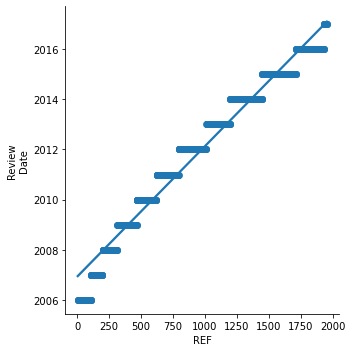

In [15]:
# Creating a scatterplot for the "REF" and "Review Date" columns in seaborn

sns.lmplot(x = 'REF', y = 'Review\nDate', data = df)

Here, in the above plot. there is a strong relationship between the REf and Review Date

Step 2.3:Pair Plots:

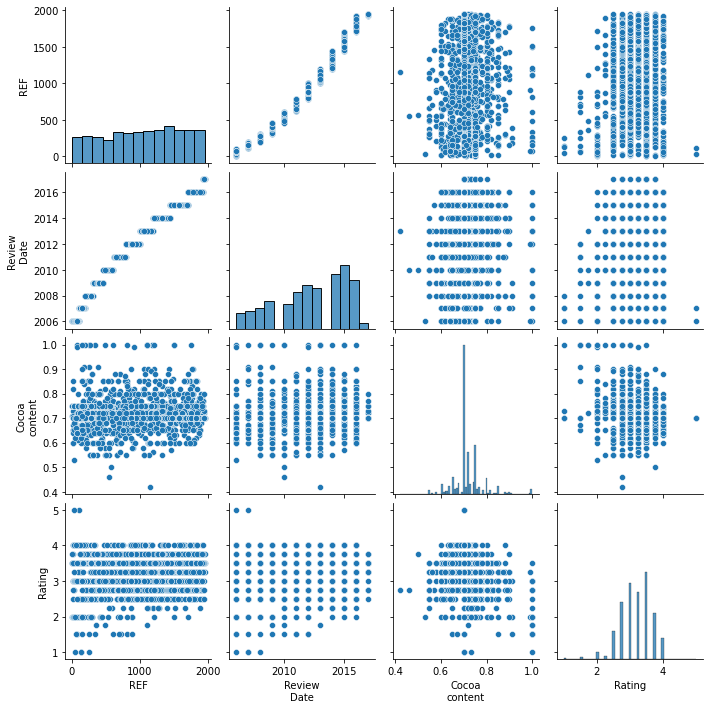

In [16]:
# Creating a pair plot 

g = sns.pairplot(df_Analysis)

The pairplot above, shows you the distribution of all numeric variables while also creating scatterplots for every variable crossed with every other variable.While the plot shows very strong relationship between the REF and Review Date.

Step 2.4 :Categorical Plots:

<AxesSubplot:xlabel='Rating', ylabel='Count'>

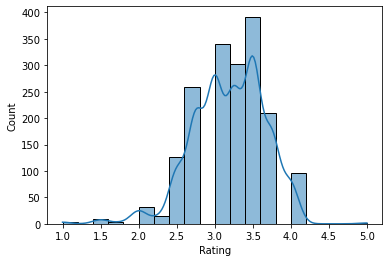

In [17]:
# Creating a categorical variable that splits the Rating column into categories

sns.histplot(df['Rating'], bins = 20, kde = True)

In [35]:
# categorizing the column
df.loc[df['Rating'] < 2, 'Rating_strength'] = 'low_rating'
df.loc[(df['Rating'] >= 2) & (df['Rating'] < 4 ), 'Rating_strength'] = 'average_rating'
df.loc[df['Rating'] >= 4, 'Rating_strength'] = 'high_rating'

In [36]:
# counting the categories
df['Rating_strength'].value_counts(dropna = False)

average_rating    1677
high_rating         99
low_rating          17
Name: Rating_strength, dtype: int64

In [20]:
df.columns

Index(['Company\n_Maker_if_ known', 'Specific Bean Origin\nor Bar Name', 'REF',
       'Review\nDate', 'Cocoa\ncontent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin', 'Rating_strength'],
      dtype='object')

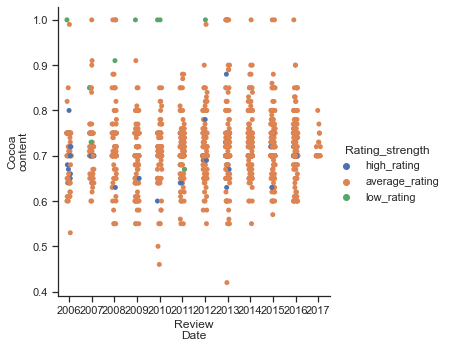

In [21]:
# Creating a categorical plot in seaborn using the rating_strength created above

sns.set(style="ticks")
g = sns.catplot(x="Review\nDate", y="Cocoa\ncontent", hue="Rating_strength", data=df)

In [22]:
# fig = g.get_figure()
g.savefig("Cateplot.png")

Based on the categorical plot shown above, most of the average and high rating falls within 0.6 to 0.8 cocoa content, while the low rating falls within the concoa content of 0.9 t0 1.0. 

In [8]:
# counting the categorical variable (Company/nlocation)
df['Company\nLocation'].value_counts(dropna = False)

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Argentina              9
Costa Rica             9
Poland                 8
Netherlands            8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Mexico                 4
Puerto Rico            4
Fiji                   4
Sao Tome               4
Ireland                4


<AxesSubplot:xlabel='Rating', ylabel='Company\nLocation'>

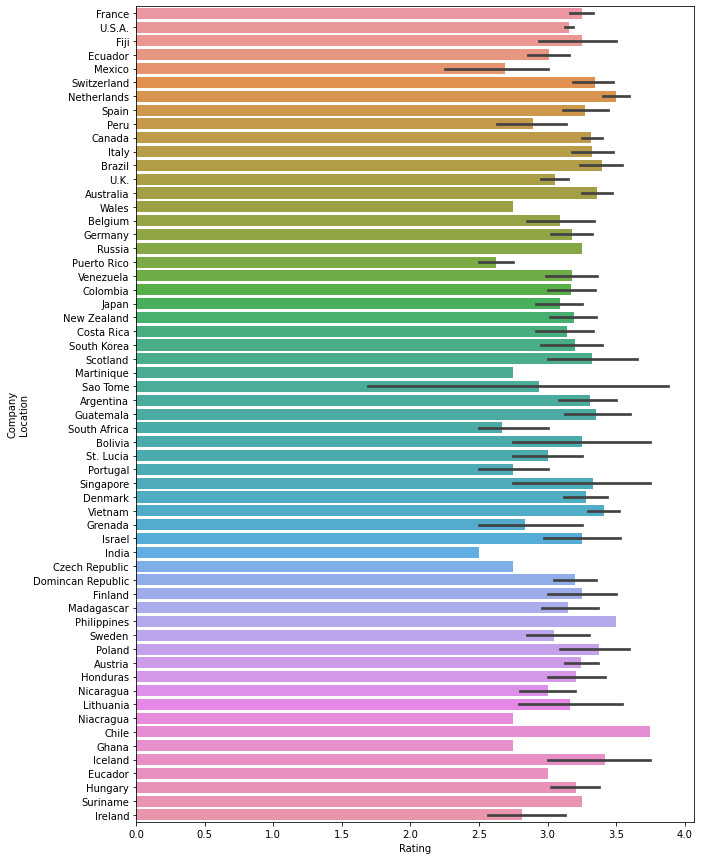

In [38]:
# plotting barplot of the categorical variable (Company\nLocation)
plt.figure(figsize=(10,15))
sns.barplot(x='Rating',y='Company\nLocation',data=df)

The average rating of companies with regards to their Country of origin is shown above. In the plot, Chile has the highest average rating. Though the count of Chile is just 2. While the top 5 count ( USA,France, Canada, U.K and Italy) have their average rating between 3 to 3.5. 

<AxesSubplot:xlabel='Rating', ylabel='Company\nLocation'>

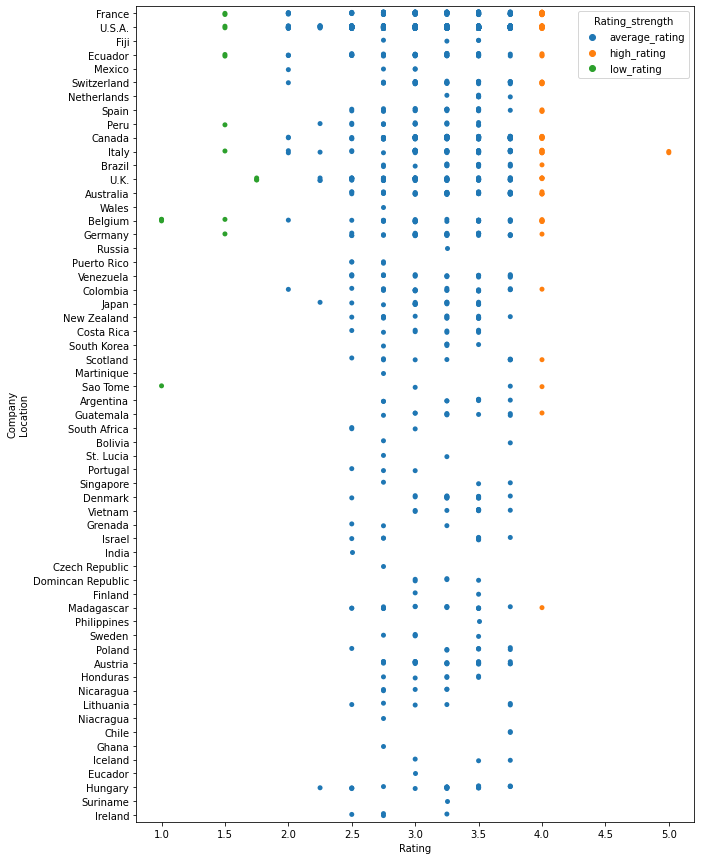

In [39]:
# plotting strip of the categorical variable (Company\nLocation)  with hue
plt.figure(figsize=(10,15))
sns.stripplot(x='Rating',y='Company\nLocation',hue="Rating_strength",data=df)

Here shows the individual rating with respect to company location, the plot shows most rating falls within the average rating while the highest rating comes from a company located in Italy with rating of 5.0. 

In [31]:
# counting the categorical variable (Bean\nType)
df['Bean\nType'].value_counts(dropna = False)

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

<AxesSubplot:xlabel='Rating', ylabel='Bean\nType'>

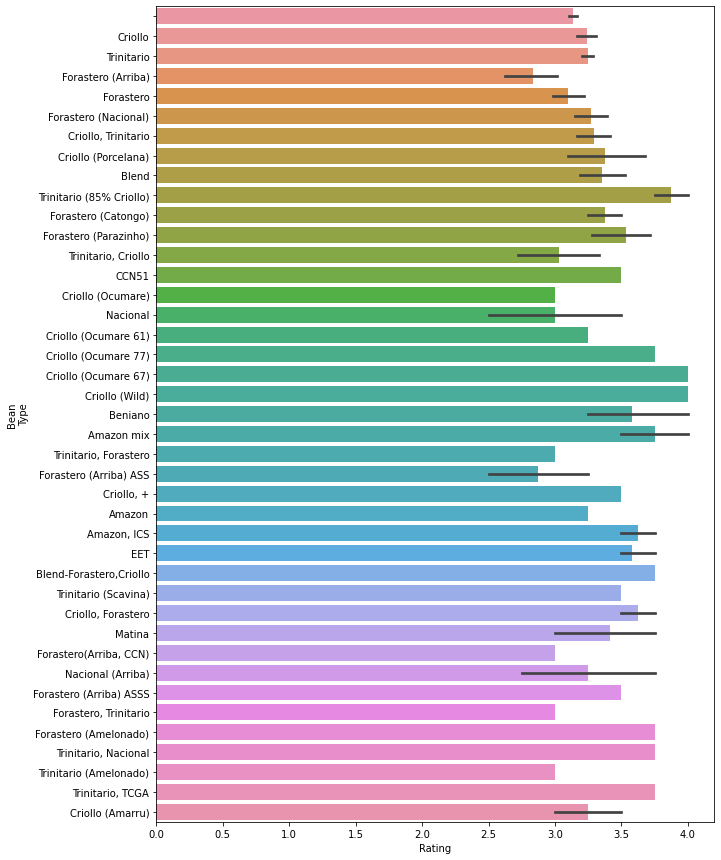

In [22]:
# plotting barplot of the categorical variable (Bean\nType)
plt.figure(figsize=(10,15))
sns.barplot(x='Rating',y='Bean\nType',data=df)

The plot above shows the Bean type rating based on average rating. The Criollo (wild) and Criollo (Ocumare 67) have the highest rating of 4.0 with count of 1 each. While the top 5 count Bean type (Trinitario,Criollo,Forastero,Forastero (Nacional) and Blend)have average rating between 3 to 4.

<AxesSubplot:xlabel='Rating', ylabel='Bean\nType'>

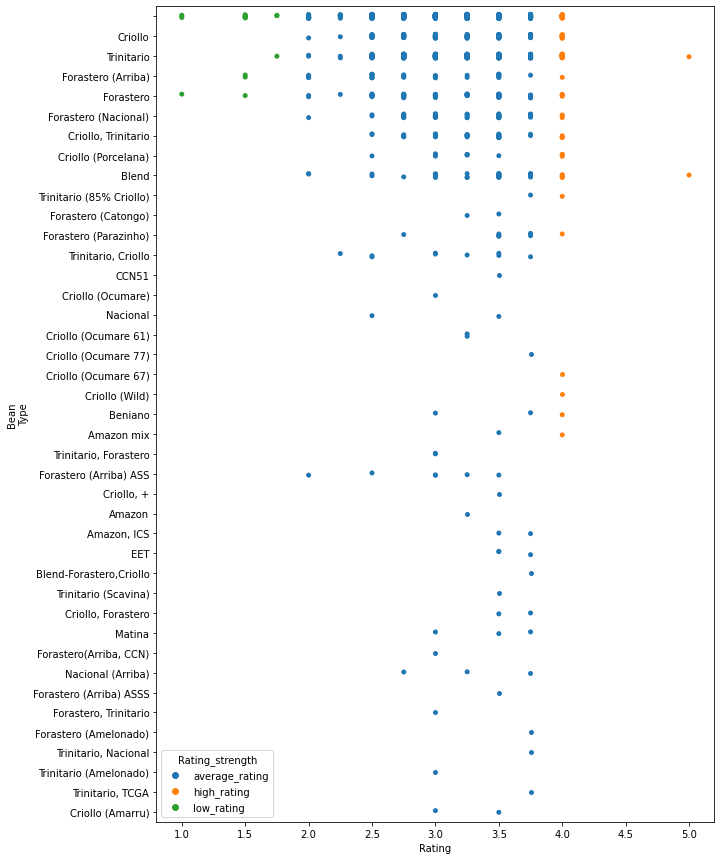

In [40]:
# plotting strip of the categorical variable (Bean\nType)  with hue
plt.figure(figsize=(10,15))
sns.stripplot(x='Rating',y='Bean\nType',hue="Rating_strength",data=df)

Here shows the individual rating with respect to Bean type, the plot shows most rating falls within the average rating while the highest rating comes from (Trinitario and Blend) Bean type with rating of 5.0. 

# Answering question

What’s the relationship between cocoa solids percentage and rating? Answer: There is a weak relationship betweenn the Cocoa content and the rating.
Which countries produce the highest-rated bars? Answer: Italy in terms of individual rating and Chile in terms of average rating.
Which continents produce the highest rated bars? Europe and South America.

# Hypothesis

if the product is made by Amedei, it will have a higher rating than other companies. 
The higher the coocoa content, the higher the rating.